### Welcome to a notebook that looks into plotting up some GPM data, both GMI and the DPR

I will try to make comments along the way, but please message me on twitter (@dopplerchase) if you have more questions

In [1]:
#load in the required packages
%pylab inline
import h5py
#this is my colormap script, can download it here: https://github.com/dopplerchase/colormaps.git
import colormaps_new as cmaps

Populating the interactive namespace from numpy and matplotlib


## How to get GPM data: 

Go to https://pmm.nasa.gov/data-access/downloads/gpm, and register with the PPS (required)

For not realtime data: ftp://arthurhou.pps.eosdis.nasa.gov/
Fore almost realtime data: ftp://jsimpson.pps.eosdis.nasa.gov/

Click the file you want and it will download. Can also use wget too

In [ ]:
filename_GMI = '/path/to/GMI/file/1B.GPM.GMI.TB2016.20190904-S103139-E103637.V05A.RT-H5'
filename_DPR = 'path/to/DPR/file/2A.GPM.DPR.V820180723.20190904-S101128-E104127.V06A.RT-H5'

In [6]:
GMI = h5py.File(filename_GMI,'r')
DPR = h5py.File(filename_DPR,'r')

### File structure

There is alot of information in these files. Keep in mind how the data are collected by each insturment. 

Check out the documentation here: https://pps.gsfc.nasa.gov/GPMprelimdocs.html

In [7]:
#load in the DPR data 
lat2 = DPR['NS']['Latitude'][:,:]
lon2 = DPR['NS']['Longitude'][:,:]
z = DPR['NS']['SLV']['zFactorCorrectedNearSurface'][:]

In [8]:
#load in the GMI data (89 GHz)
lon = hdf['S1']['Longitude'][:]
lat = hdf['S1']['Latitude'][:]
Tb = hdf['S1']['Tb'][:,:,-1]-273

#here is the list of channels 
S1 = ['10V','10H','19V','19H','23V','37V','37H','89V','89H']
S2 = ['166V','166H','183+/-3V','183+/-8V']


### this next bit is a bit of hard code to change the length of the cross sections

In [9]:
#where are the DPR longitudes greater than or equal to -79.25
ind = np.where(lon2[:,0] >= -79.25)
#where are the DPR longitudes less than or equal to -77
ind2 = np.where(lon2[:,0] <= -77)
#where are both conditions satisfied 
ind3 = np.intersect1d(ind,ind2)
ind3

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027,
       2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038,
       2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049,
       2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060,
       2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071,
       2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082,
       2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093,
       2094])

### Let's load in the mapping tools

In [10]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.patheffects as PathEffects
import cartopy.io.shapereader as shpreader


/data/keeling/a/randyjc2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


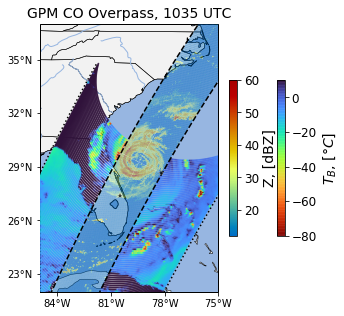

In [11]:
#define figure
plt.figure(figsize=(5,5*1.91))
#make the map axis
ax = plt.axes(projection=ccrs.PlateCarree())
#add US states
ax.add_feature(cfeature.STATES.with_scale('50m'),lw=0.5)
#add ocean
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'))
#add land with grey face
ax.add_feature(cartopy.feature.LAND.with_scale('50m'), edgecolor='black',lw=0.5,facecolor=[0.95,0.95,0.95])
#add lakes
ax.add_feature(cartopy.feature.LAKES.with_scale('50m'), edgecolor='black')
#add rivers
ax.add_feature(cartopy.feature.RIVERS.with_scale('50m'))

#plot GMI data only outside the GPM-DPR swath, this is a bit of hard coding with the 92/137
pm = ax.scatter(lon[:,:92],lat[:,:92],c=Tb[:,:92],s=0.75,cmap=cmaps.turbo_r,edgecolor=None,zorder=3,alpha=0.75,vmin=-80,vmax=10)
pm = ax.scatter(lon[:,137:],lat[:,137:],c=Tb[:,137:],s=0.75,cmap=cmaps.turbo_r,edgecolor=None,zorder=3,alpha=0.75,vmin=-80,vmax=10)

#plot the DPR swath 
pm2 = ax.scatter(lon2,lat2,c=z,s=0.5,vmin=12,vmax=60,cmap=cmaps.HomeyerRainbow,edgecolor='k',linewidth=0.001,zorder=3)
#plot swath edges of the DPR
ax.plot(lon2[:,0]+0.03,lat2[:,0]-0.03,'--k',zorder=4)
ax.plot(lon2[:,-1]-0.03,lat2[:,-1]+0.03,'--k',zorder=4)

#plot cross-section lines, again more hard code here
ax.plot(lon2[ind3,27],lat2[ind3,27],'-w',zorder=4,lw=0.25,alpha=0.75)
ax.plot(lon2[ind3[0],27],lat2[ind3[0],27],'*w',zorder=4,lw=0.25,alpha=0.75,markerfacecolor='k',markeredgewidth=0.25)
ax.plot(lon2[2043,:],lat2[2043,:],'-w',zorder=4,lw=0.25,alpha=0.75)
ax.plot(lon2[2043,0],lat2[2043,0],'*w',zorder=4,lw=0.25,alpha=0.75,markerfacecolor='k',markeredgewidth=0.25)

#plot swaths (GMI) 
ax.plot(lon[:,0]-0.1,lat[:,0],':k',zorder=4)
ax.plot(lon[:,-1]+0.1,lat[:,-1],':k',zorder=4)
#these are for the rounded edges 
# ax.plot(lon[0,:110]+0.075,lat[0,:110]+0.075,':k',zorder=4)
# ax.plot(lon[0,110:]-0.075,lat[0,110:]+0.075,':k',zorder=4)

#set the ticks
ax.set_xticks(np.arange(-84, -71, 3), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(20, 36, 3), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

#set the bounds of the map
ax.set_extent([-85,-75,22,37])

#add GMI colorbar
cbar = plt.colorbar(pm,shrink=0.3)
cbar.set_label('$T_B$, [$\degree{C}$]',fontsize=14)
cbar.ax.tick_params(labelsize=12)

#Add DPR colorbar
cbar = plt.colorbar(pm2,shrink=0.3)
cbar.set_label('Z, [dBZ]',fontsize=14)
cbar.ax.tick_params(labelsize=12)

#set title
ax.set_title('GPM CO Overpass, 1035 UTC',fontsize=14)

plt.tight_layout()

#save it 
plt.savefig('Dorian_GPMCO.png',dpi=500)

### this next bit is for calculating the heights of the GPM-DPR gates

In [20]:
#make 2d coords for ploting

x2 = 2. * 17 #total degrees is 48 (from -17 to +17)
re = 6378. #radius of the earth km 
theta = -1 *(x2/2.) + (x2/48.)*np.arange(0,49) #break the -17 to 17 into equal degrees 

theta2 = np.zeros(theta.shape[0]+1)
theta = theta - 0.70833333/2. #shift thing to get left edge for pcolors
theta2[:-1] = theta 
theta2[-1] = theta[-1] + 0.70833333
theta = theta2 * (np.pi/180.) #convert to radians

prh = np.zeros([177,50]) #set up matrix 
for i in np.arange(0,177): #loop over num range gates
    for j in np.arange(0,50): #loop over scans 
        a = np.arcsin(((re+407)/re)*np.sin(theta[j]))-theta[j] #407 km is the orbit height, re radius of earth, 
        prh[i,j] = (176-(i))*0.125*np.cos(theta[j]+a) #more geometry 
        
h2 = prh

h3 = np.zeros([h2.shape[0],h2.shape[1]])
for i in np.arange(0,h3.shape[1]):
    h3[:,i] = h2[::-1,i] #reverse order so as index go up the height goes up


In [15]:
#we need pyproj to calculate distances from lat lon, note this is an older version of pyproj: 1.9.5.1
from pyproj import Proj

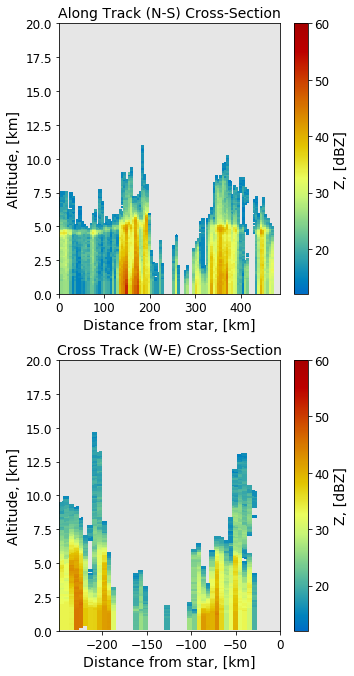

In [31]:
#import dBZ
ku = data['NS']['SLV']['zFactorCorrected'][ind3,:,:]
#cut it to the same ray as above 
ku = ku[:,27,:]
lons = data['NS']['Longitude'][ind3,27]
lats = data['NS']['Latitude'][ind3,27]

# pick the starting point to be the reference point to calc dist. 
lat0 = lats[0]
lon0 = lons[0]
#this projection is not exactly right, but works 
p = Proj(proj='laea', zone=10, ellps='WGS84',lat_0=lat0,lon_0=lon0)

#make it 2d for the pcolormesh 
lat_3d = np.zeros(ku.shape)
lon_3d = np.zeros(ku.shape)
for i in np.arange(0,ku.shape[0]):
    lat_3d[i,:] = lats[i]
    lon_3d[i,:] = lons[i]
#convert to distances 
x,y = p(lon_3d,lat_3d)
#get the radial distance
R_gpm = np.sqrt(x**2  + y**2)*np.sign(x)
#flip the order of the range gates
ku = ku[:,::-1]


#mask bad data
ku = np.ma.masked_where(ku <= 12,ku)


y = np.zeros([ku.shape[0],ku.shape[1]])

#make sure this number matches the one above 
h4 = h3[:,27]
    
for i in np.arange(y.shape[1]):
    y[:,i] = h4[i]


#make figure
fig,axes = plt.subplots(2,1,figsize=(5,5*1.9))
#set colorlimits
vmax = 60
vmin= 12
#set left right bounds 
R_min = R_gpm.min()
R_max = R_gpm.max()
        
#plot ~N-S cross-section
ax = axes[0]
pm= ax.pcolormesh(R_gpm/1000.,y,ku,cmap=cmaps.HomeyerRainbow,vmin=vmin,vmax=vmax)
ax.set_facecolor([0.9,0.9,0.9])


ax.set_ylabel('Altitude, [km]',fontsize=14)
ax.set_xlabel('Distance from star, [km]',fontsize=14)
ax.tick_params(labelsize=12)
ax.set_ylim([0,20])
ax.set_xlim([R_min/1000.,R_max/1000.])
cbar = plt.colorbar(pm,ax=ax)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Z, [dBZ]',fontsize=14)

#now lets do the ~W-E cross-section 
ku = data['NS']['SLV']['zFactorCorrected'][2043,:,:]
lons = data['NS']['Longitude'][2043,:]
lats = data['NS']['Latitude'][2043,:]
# pick the starting point to be the reference point to calc dist. 
lat0 = lats[0]
lon0 = lons[0]

p = Proj(proj='laea', zone=10, ellps='WGS84',lat_0=lat0,lon_0=lon0)
#make it 2d for the pcolormesh 
lat_3d = np.zeros(ku.shape)
lon_3d = np.zeros(ku.shape)
for i in np.arange(0,ku.shape[0]):
    lat_3d[i,:] = lats[i]
    lon_3d[i,:] = lons[i]
    
#convert to distances 
x,y = p(lon_3d,lat_3d)
#get the radial distance
R_gpm = np.sqrt(x**2  + y**2)*np.sign(x)
#flip the order of the range gates
ku = ku[:,::-1]

#mask bad data
ku = np.ma.masked_where(ku <= 12,ku)


y = h3.T


R_min = R_gpm.min()
R_max = R_gpm.max()
        
# # # Ku, Ka,lon,lat = match_hiwrap(hiwrap,hiwrap2,inds=True,ind_hiwrap=ind_hiwrap,ind_hiwrap2=ind_hiwrap2)

ax = axes[1]
pm= ax.pcolormesh(R_gpm/1000.,h3[1:,1:].T,ku,cmap=cmaps.HomeyerRainbow,vmin=vmin,vmax=vmax)
ax.set_facecolor([0.9,0.9,0.9])


ax.set_ylabel('Altitude, [km]',fontsize=14)
ax.set_xlabel('Distance from star, [km]',fontsize=14)
ax.tick_params(labelsize=12)
ax.set_ylim([0,20])
ax.set_xlim([R_min/1000.,R_max/1000.])
cbar = plt.colorbar(pm,ax=ax)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Z, [dBZ]',fontsize=14)

axes[0].set_title('Along Track (N-S) Cross-Section',fontsize=14)
axes[1].set_title('Cross Track (W-E) Cross-Section',fontsize=14)
plt.tight_layout()

#save it 
plt.savefig('Dorian_crosssection_GPM_DPR.png',dpi=500)